In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
from sklearn.pipeline import Pipeline
from pathlib import Path

In [2]:
file ='AI_Powered_Eduction_system'
def root(root_name:str=file):
    for parent in Path().resolve().parents:
        if parent.name == root_name:
            return(parent) 
ROOT = root()

In [3]:
student_data = pd.read_csv(ROOT/'data\Train_datasets\Learning_style\student_data.csv')
student_data = student_data.rename(columns={'max_time_spent':'time_of_day'})
student_data.head(10)

<>:1: SyntaxWarning: invalid escape sequence '\T'
<>:1: SyntaxWarning: invalid escape sequence '\T'
C:\Users\Udith\AppData\Local\Temp\ipykernel_19376\2393794112.py:1: SyntaxWarning: invalid escape sequence '\T'
  student_data = pd.read_csv(ROOT/'data\Train_datasets\Learning_style\student_data.csv')


,Student_ID,attempt_count,num_of_videos,num_of_books,time_on_topic,avg_score,avg_timetaken
0,1,6,70,1.0,564.0,23.0,69.0
1,2,12,67,6.0,560.0,56.0,104.0
2,3,13,35,2.0,288.0,13.0,52.0
3,4,9,73,3.0,596.0,82.0,18.0
4,5,10,12,17.0,29.0,70.0,80.0
5,6,12,68,5.0,292.0,4.0,36.0
6,7,6,64,4.0,264.0,56.0,48.0
7,8,16,36,19.0,273.0,83.0,64.0
8,9,1,54,3.0,444.0,40.0,10.0
9,10,17,82,6.0,176.0,65.0,30.0


In [4]:
def boxplot(df,cols):
    for col in cols:
        fig,ax = plt.subplots()
        fig = sns.boxplot(data=df,x=col)
    return fig

<Axes: xlabel='avg_timetaken'>

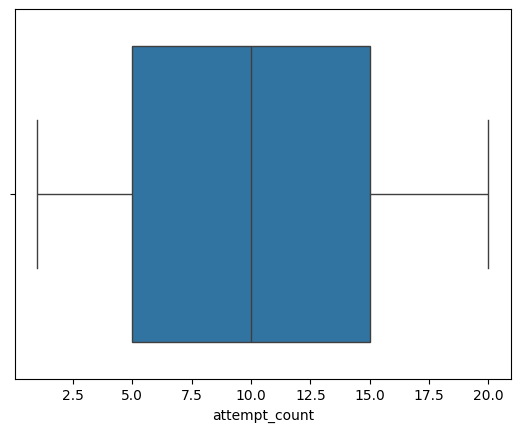

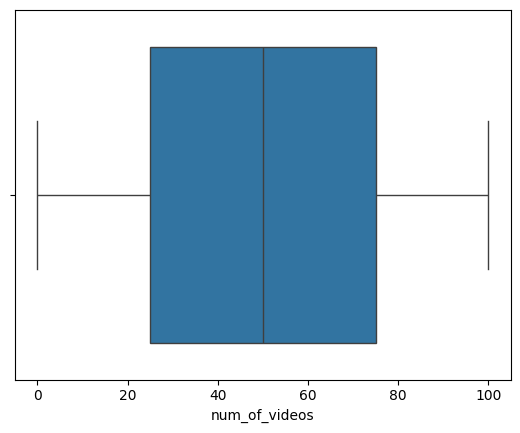

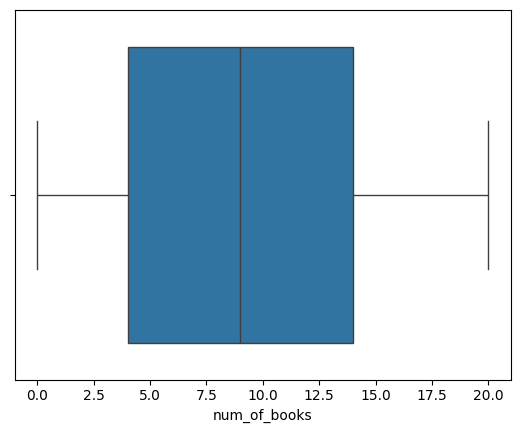

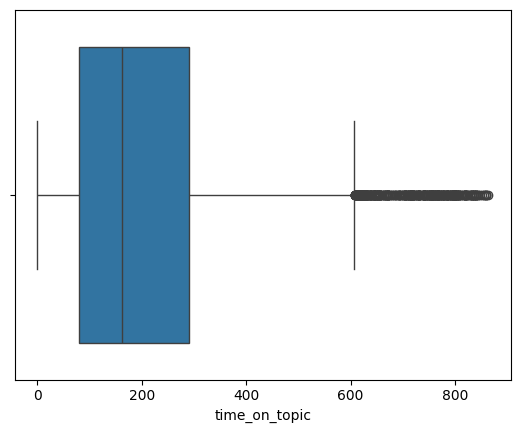

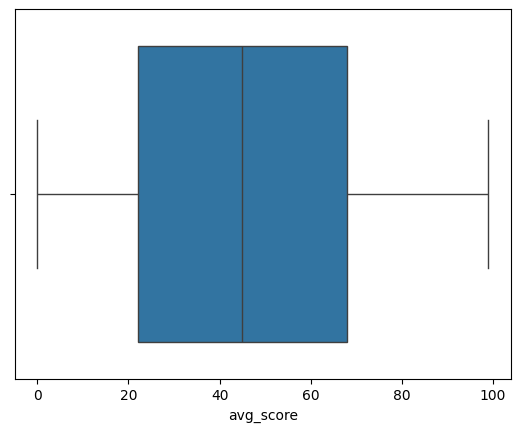

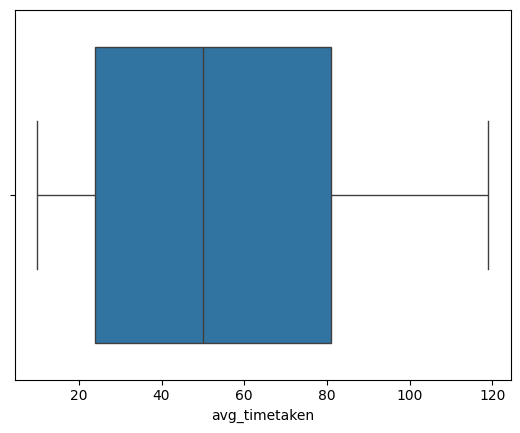

In [5]:
cols = list(student_data.columns)
cols.remove('Student_ID')
boxplot(student_data,cols)

In [6]:
def histogram(df,cols):
    for col in cols:
        fig,ax = plt.subplots()
        fig = sns.histplot(df,x=col)
    return fig

<Axes: xlabel='avg_timetaken', ylabel='Count'>

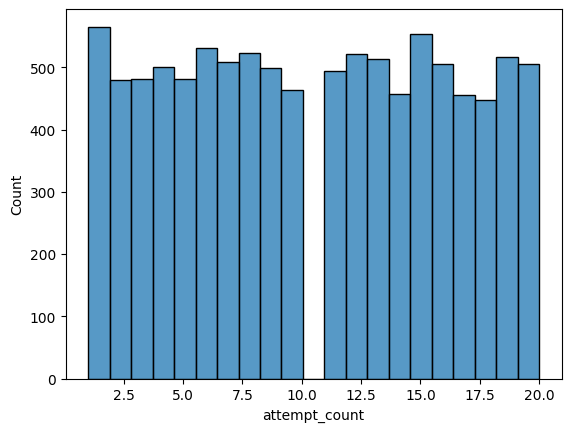

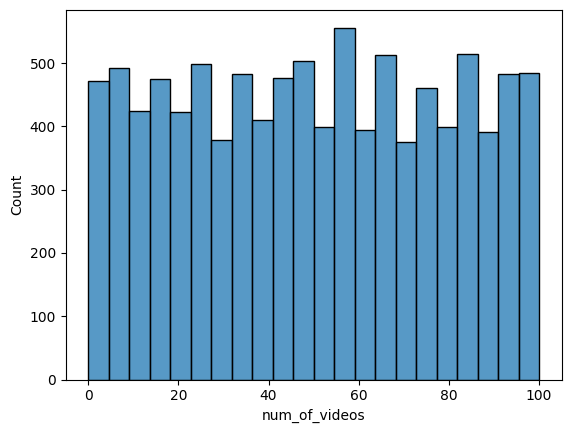

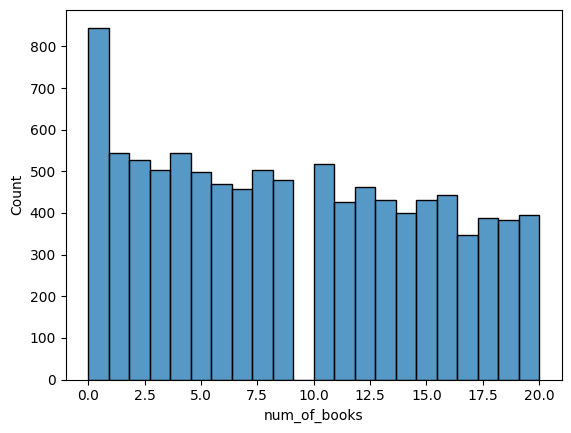

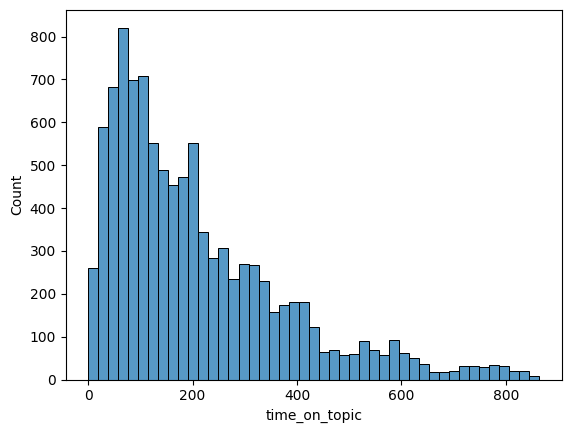

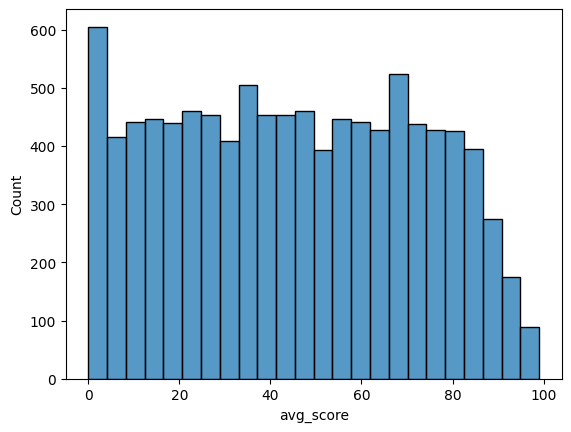

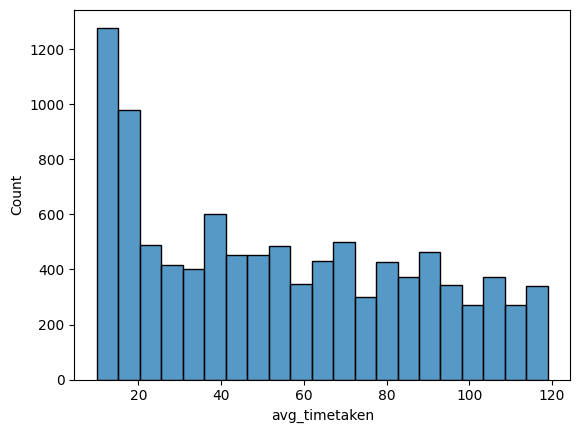

In [7]:
histogram(student_data,cols)

In [8]:
student_data.head()

,Student_ID,attempt_count,num_of_videos,num_of_books,time_on_topic,avg_score,avg_timetaken
0,1,6,70,1.0,564.0,23.0,69.0
1,2,12,67,6.0,560.0,56.0,104.0
2,3,13,35,2.0,288.0,13.0,52.0
3,4,9,73,3.0,596.0,82.0,18.0
4,5,10,12,17.0,29.0,70.0,80.0


In [9]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

In [10]:
student_data[['num_of_videos','num_of_books']].mean()
a = (student_data['num_of_videos'].mean()/student_data['num_of_books'].mean()).round()

In [11]:
student_data1 = student_data.copy()
# student_data1['max_content_type'] = np.where(student_data1['num_of_videos']>((student_data1['num_of_books'])*a).round(),'videos','books')
# student_data1.head(10)

In [12]:
student_data1.head(10)

,Student_ID,attempt_count,num_of_videos,num_of_books,time_on_topic,avg_score,avg_timetaken
0,1,6,70,1.0,564.0,23.0,69.0
1,2,12,67,6.0,560.0,56.0,104.0
2,3,13,35,2.0,288.0,13.0,52.0
3,4,9,73,3.0,596.0,82.0,18.0
4,5,10,12,17.0,29.0,70.0,80.0
5,6,12,68,5.0,292.0,4.0,36.0
6,7,6,64,4.0,264.0,56.0,48.0
7,8,16,36,19.0,273.0,83.0,64.0
8,9,1,54,3.0,444.0,40.0,10.0
9,10,17,82,6.0,176.0,65.0,30.0


In [13]:
student_data1 = student_data1.drop(columns=['Student_ID'],axis=0)

In [14]:
student_data1.head()

,attempt_count,num_of_videos,num_of_books,time_on_topic,avg_score,avg_timetaken
0,6,70,1.0,564.0,23.0,69.0
1,12,67,6.0,560.0,56.0,104.0
2,13,35,2.0,288.0,13.0,52.0
3,9,73,3.0,596.0,82.0,18.0
4,10,12,17.0,29.0,70.0,80.0


In [15]:
student_data.isnull().sum()

Student_ID       0
attempt_count    0
num_of_videos    0
num_of_books     0
time_on_topic    0
avg_score        0
avg_timetaken    0
dtype: int64

<Axes: >

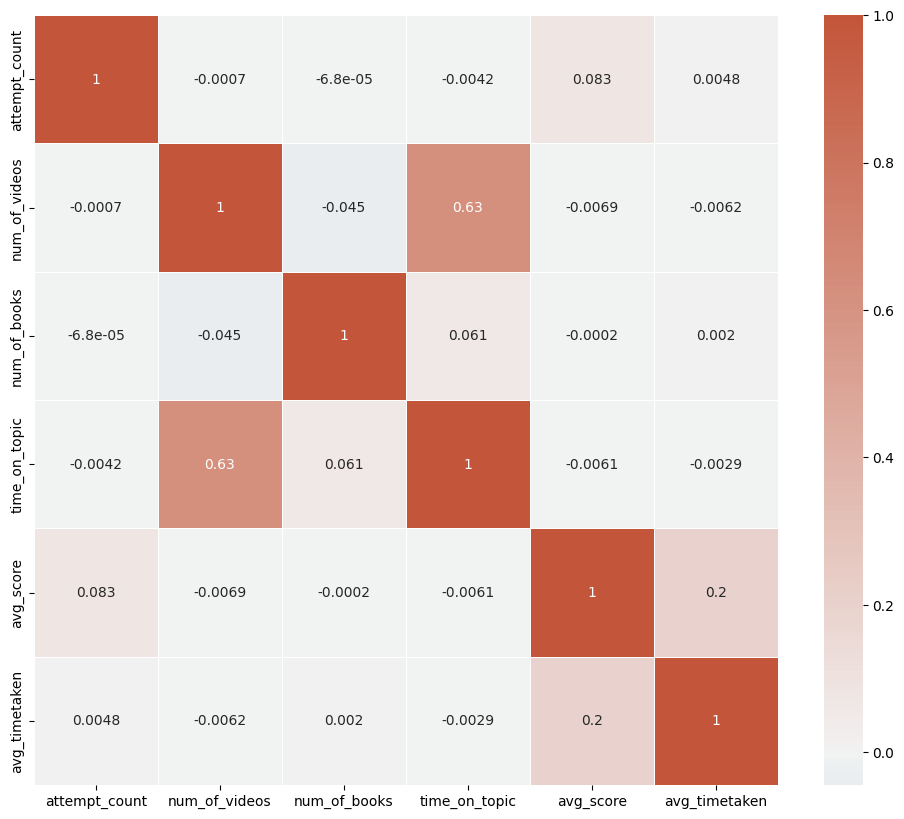

In [16]:
corr_mat = student_data1.corr()
fig,ax = plt.subplots(figsize=(12,10))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr_mat,cmap=cmap,linewidths=0.5,linecolor='white',center=0,annot=True)

In [17]:
student_data1.var().sort_values(ascending=False)

time_on_topic    28839.951919
avg_timetaken     1061.222036
num_of_videos      841.000119
avg_score          716.620455
num_of_books        37.564051
attempt_count       33.378139
dtype: float64

In [18]:
scaler = StandardScaler(with_mean=True)
x_scaled = scaler.fit_transform(student_data1)

In [19]:
pca =PCA(n_components=2)
pcomp = pca.fit_transform(x_scaled)
plot_df = pd.DataFrame(pcomp,columns=['Pc1','Pc2'])

In [20]:
kmeans = KMeans(n_clusters=32,random_state=2)
lables = kmeans.fit_predict(x_scaled)
print('silhouette_score:',silhouette_score(x_scaled,lables).round(4))

silhouette_score: 0.1507


<Axes: xlabel='Pc1', ylabel='Pc2'>

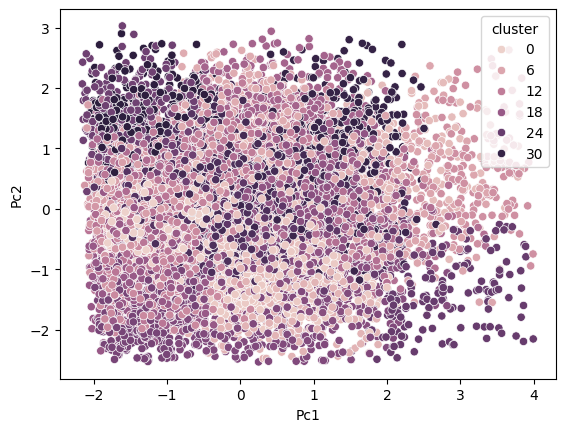

In [21]:
plot_df['cluster']=lables
sns.scatterplot(plot_df,x='Pc1',y='Pc2',hue='cluster')

In [22]:
st_data = student_data.copy()
st_data['cluster']=lables
st_data.groupby('cluster')[cols].mean().round(2)

,attempt_count,num_of_videos,num_of_books,time_on_topic,avg_score,avg_timetaken
cluster,,,,,,
0,6.01,22.97,15.11,106.76,61.26,32.18
1,14.92,71.44,3.37,242.96,12.46,25.26
2,5.91,68.11,3.81,162.02,62.40,34.63
3,5.64,79.75,4.96,533.55,53.92,90.49
4,6.15,61.48,15.25,233.37,17.63,26.45
5,11.38,59.45,15.18,180.93,69.92,93.72
6,15.62,81.47,4.80,589.58,36.92,63.81
7,15.39,20.92,4.60,80.94,74.68,28.65
8,6.71,20.38,4.01,77.56,27.41,83.52


In [23]:
scaler = StandardScaler(with_std=True)
x_scaled_std = scaler.fit_transform(student_data1)

In [24]:
kmeans = KMeans(n_clusters=32,random_state=2)
lables_std = kmeans.fit_predict(x_scaled_std)
print('silhouette_score:',silhouette_score(x_scaled_std,lables_std).round(4))

silhouette_score: 0.1507


<Axes: xlabel='Pc1', ylabel='Pc2'>

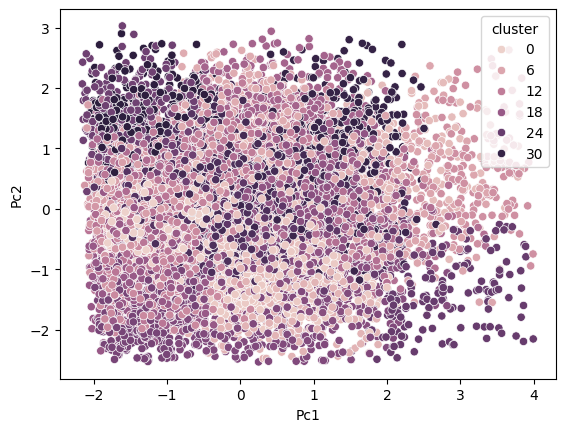

In [25]:
pca =PCA(n_components=2)
pcomp = pca.fit_transform(x_scaled_std)
plot_df_std = pd.DataFrame(pcomp,columns=['Pc1','Pc2'])
plot_df_std['cluster']=lables_std
sns.scatterplot(plot_df_std,x='Pc1',y='Pc2',hue='cluster')

In [26]:
st_data['cluster_std']=lables_std
st_data.groupby('cluster_std')[cols].mean()

,attempt_count,num_of_videos,num_of_books,time_on_topic,avg_score,avg_timetaken
cluster_std,,,,,,
0,6.010899,22.970027,15.106267,106.757493,61.256131,32.182561
1,14.916898,71.440443,3.371191,242.955679,12.462604,25.257618
2,5.906516,68.113314,3.807365,162.022663,62.402266,34.626062
3,5.638418,79.751412,4.960452,533.548023,53.920904,90.491525
4,6.152439,61.481707,15.246951,233.371951,17.628049,26.454268
5,11.380623,59.446367,15.179931,180.934256,69.923875,93.719723
6,15.622120,81.465438,4.801843,589.576037,36.921659,63.806452
7,15.393750,20.925000,4.596875,80.943750,74.675000,28.653125
8,6.714724,20.377301,4.012270,77.564417,27.414110,83.524540


In [27]:
student_data.head()

,Student_ID,attempt_count,num_of_videos,num_of_books,time_on_topic,avg_score,avg_timetaken
0,1,6,70,1.0,564.0,23.0,69.0
1,2,12,67,6.0,560.0,56.0,104.0
2,3,13,35,2.0,288.0,13.0,52.0
3,4,9,73,3.0,596.0,82.0,18.0
4,5,10,12,17.0,29.0,70.0,80.0


In [28]:
df = pd.DataFrame({'clusters':[],'ss':[]})
for i in range(2,100):
    kmeans = KMeans(n_clusters=i,random_state=2)
    lables_std = kmeans.fit_predict(x_scaled_std)
    df.loc[(i-2)]=[i,silhouette_score(x_scaled_std,lables_std).round(4)]
df.head()   

,clusters,ss
0,2.0,0.1751
1,3.0,0.1494
2,4.0,0.1420
3,5.0,0.1421
4,6.0,0.1407


In [29]:
df[df['ss']==max(df['ss'])]

,clusters,ss
0,2.0,0.1751


In [30]:
from sklearn.cluster import DBSCAN


In [32]:
i = 30
df1= pd.DataFrame({'eps':[],'ss':[]})
for x in range(200):
    i+=0.1
    try:
        db = DBSCAN(eps=i,min_samples=5)
        lables=db.fit_predict(x_scaled_std)
        if -1 not in lables:
            ss = (silhouette_score(x_scaled_std,lables).round(4))
            df1.loc[x]=[i,ss]
            if ss >= 0.5:
                break
    except:
        continue

if len(df1) != 0:
    print(df1[df1['ss']==max(df1['ss'])])

In [ ]:
KM = KMeans(n_clusters=6,random_state=40)
lables_KM=KM.fit_predict(student_data1)
silhouette_score(x_scaled_std,lables_KM).round(4)

0.0343

<Axes: xlabel='Pc1', ylabel='Pc2'>

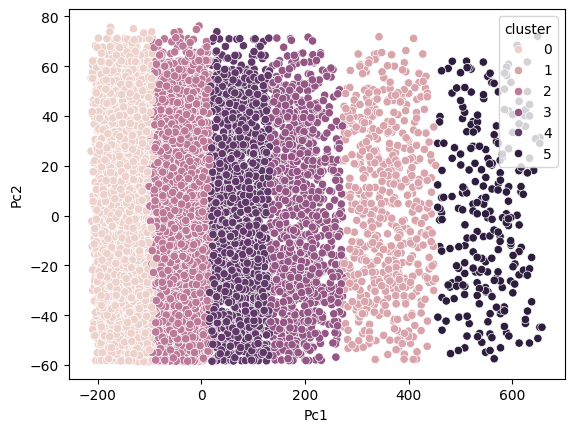

In [ ]:
pca =PCA(n_components=2)
pcomp = pca.fit_transform(student_data1)
plot_df_nrm = pd.DataFrame(pcomp,columns=['Pc1','Pc2'])
plot_df_nrm['cluster']=lables_KM
sns.scatterplot(plot_df_nrm,x='Pc1',y='Pc2',hue='cluster')

In [ ]:
kmeans = KMeans(n_clusters=32,random_state=40)
lables = kmeans.fit_predict(x_scaled)
print('silhouette_score:',silhouette_score(x_scaled,lables).round(4))

silhouette_score: 0.1502


In [ ]:
x_data = student_data.copy()
x_data = x_data.drop(columns='Student_ID',axis=1)

In [ ]:
pipe = Pipeline(steps=[('scaler',scaler),('model',kmeans)])

In [ ]:
lables = pipe.fit_predict(x_data)

In [ ]:
st_data = student_data.copy()
st_data['cluster']=lables
mean_df = st_data.groupby('cluster')[cols].mean().round(2)
m_ac = student_data['attempt_count'].mean().round(1)
m_nov = student_data['num_of_videos'].mean().round(1)
m_nob = student_data['num_of_books'].mean().round(1)
m_tot = student_data['time_on_topic'].mean().round(1)
m_as = student_data['avg_score'].mean().round(1)
m_at = student_data['avg_timetaken'].mean().round(1)

In [ ]:
for index,row in mean_df.iterrows():
    if row['attempt_count']<= m_ac:
        mean_df.loc[index,'attempt'] = 'Efficient'
    elif row['attempt_count'] > m_ac:
        mean_df.loc[index,'attempt'] = 'Resilient'
    if (row['num_of_videos']<= m_nov) and (row['num_of_books']>= m_nob):
        mean_df.loc[index,'content'] = 'book'
    elif (row['num_of_videos']>= m_nov) and (row['num_of_books']<= m_nob):
        mean_df.loc[index,'content'] = 'video'
    else:
        mean_df.loc[index,'content'] = 'multiple'
    if row['time_on_topic']<=m_tot:
        mean_df.loc[index,'speed'] = 'fast'
    elif row['time_on_topic']>m_tot:
        mean_df.loc[index,'speed'] = 'slow'
    if row['avg_timetaken'] <= m_at:
        mean_df.loc[index,'time'] = 'quick'
    elif row['avg_timetaken'] > m_at:
        mean_df.loc[index,'time'] = 'time taking'
    if row['avg_score']<=m_as:
        mean_df.loc[index,'score'] = 'low scorer'
    elif row['avg_score'] > m_as:
        mean_df.loc[index,'score'] = 'high scorer'

mean_df['Learning_style'] = mean_df['attempt']+'-'+mean_df['content']+' type-'+mean_df['speed']+' learner-'+mean_df['time']+'-'+mean_df['score']
mean_df

,attempt_count,num_of_videos,num_of_books,time_on_topic,avg_score,avg_timetaken,attempt,content,speed,time,score,Learning_style
cluster,,,,,,,,,,,,
0,14.88,24.81,4.59,93.28,21.47,29.92,Resilient,multiple,fast,quick,low scorer,Resilient-multiple type-fast learner-quick-low...
1,15.82,30.79,14.24,131.05,29.57,89.28,Resilient,book,fast,time taking,low scorer,Resilient-book type-fast learner-time taking-l...
2,15.91,66.58,4.74,208.08,30.69,85.08,Resilient,video,fast,time taking,low scorer,Resilient-video type-fast learner-time taking-...
3,5.63,25.14,14.70,111.94,13.32,26.34,Efficient,book,fast,quick,low scorer,Efficient-book type-fast learner-quick-low scorer
4,14.85,83.49,10.72,575.19,72.03,37.70,Resilient,multiple,slow,quick,high scorer,Resilient-multiple type-slow learner-quick-hig...
5,4.69,77.93,3.31,475.00,34.22,31.91,Efficient,video,slow,quick,low scorer,Efficient-video type-slow learner-quick-low sc...
6,5.26,23.25,3.87,80.14,67.39,83.43,Efficient,multiple,fast,time taking,high scorer,Efficient-multiple type-fast learner-time taki...
7,14.76,76.67,3.49,242.58,64.54,29.68,Resilient,video,slow,quick,high scorer,Resilient-video type-slow learner-quick-high s...
8,7.26,33.82,15.22,140.40,68.42,93.68,Efficient,book,fast,time taking,high scorer,Efficient-book type-fast learner-time taking-h...


In [ ]:
cluster_names = mean_df['Learning_style'].to_frame().reset_index()
cluster_names.head()

,cluster,Learning_style
0,0,Resilient-multiple type-fast learner-quick-low...
1,1,Resilient-book type-fast learner-time taking-l...
2,2,Resilient-video type-fast learner-time taking-...
3,3,Efficient-book type-fast learner-quick-low scorer
4,4,Resilient-multiple type-slow learner-quick-hig...


In [ ]:
file = ROOT/'Models\Learning_style.sav'
pickle.dump(pipe,open(file,'wb'))
cluster_names.to_csv(ROOT/'data\Working_Data\Cluster_names.csv')